# Probabilidade com Python: Probabilidades e Amostragem

In [0]:
from scipy.stats import binom
from scipy.stats import norm

## 1. Distribuição Binomial
Calcula a probabilidad de sucessos de um evento, na qual o espaço amostral é composto apenas por dois eventos, sucesso ou fracasso. Dentre n tentativas, calcula probabilidae de k sucessos.
1. P(k) = comb(n,k) * p^k * (1-p)^(n-k)

In [0]:
#Calculando combinação e probabilidade com bib
from scipy.special import comb

combinacoes = comb(25,20)
print('Combinações', combinacoes)

prob = 1/combinacoes
print('Probabilidade de Vitória:', '%0.15f' %prob)

Combinações 53130.0
Probabilidade de Vitória: 0.000018821757952

In [0]:
#Probabilidade de uma moeda jogada 4 vezes para o alto, cair duas vezes com a cara virada pra cima
p1 = binom.pmf(2,4,0.5)
print(p1)

#Probabilidade de um dado jogado para o alto 10 vezes cair com o numero 5 voltado para cima pelo menos 3 vezes
p21 = 1 - binom.cdf(2,10,1/6)
p22 = binom.sf(2,10,1/6)
print(f'{p21} ou {p22}')

0.3750000000000001
0.2247732021287404 ou 0.22477320212874052

In [0]:
#Suponha que a probabilidade de um casal ter filhos com olhos azuis seja de 22%. Em 50 famílias, com 3 crianças cada uma, quantas podemos esperar que tenham dois filhos com olhos azuis?

p1 = binom.pmf(2,3,0.22)
e = 50*p1
e

Out[4]: 5.662799999999999

## 2. Distribuição de Poisson
Utilizado para contextos de contagem, apenas empregadas em casos onde se quer saber dos sucessos.

In [0]:
import numpy as np
from scipy.special import factorial
from scipy.stats import poisson

In [0]:
np.e

Out[6]: 2.718281828459045

In [0]:
#Um restaurante recebe, em média, 20 pedidos por hora. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba 15 pedidos?

mi = 20
k = 15

#manual
poisson1 = ((np.e**(-mi))*((mi)**k))/factorial(k)

#função poisson
poisson2 = poisson.pmf(15,20)

print('%0.6f'%poisson1)
print('%0.6f'%poisson2)


0.051649
0.051649

In [0]:
#O número médio de clientes que entram em uma padaria por hora é igual a 20. Obtenha a probabilidade de, na próxima hora, entrarem exatamente 25 clientes.

p = poisson.pmf(25,20)
p

Out[8]: 0.04458764910826764

## 3. Distribuição Normal
É a distribuição mais utilizada na Estatística. Distribuição Contínua que por meio dela, podemos demonstrar o Teorema do Limite Central (com o aumento da amostra a distribuição das médias amstraris tendem a seguir uma distribuição Normal.)

In [0]:
import pandas as pf
import numpy as np
from scipy.stats import norm

Para encontrar a áres abaixo da curva normal em qualquer contexto, precisamos transformar a variável do contexto para uma variável Z (Normal Padronizada)

In [0]:
#Em um estudo sobre as alturas dos moradores de uma cidade, verificou-se que o conjunto de dados segue uma Distribuição aproximadamente Normal, com média 1.7 e desvio padrão 0.1. Com essas informações, deveremos obter um conjunto de probabilidades.O primeiro será o cálculo da probabilidade de uma pessoa selecionada ao acaso ter menos de 1,80 metros:

mi = 1.7
sig = 0.1
varOri = 1.80
varPadr = (1.80 - mi)/sig

varPadr

Out[10]: 1.0000000000000009

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
        index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
        columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


In [0]:
#Utilizando a tabela com a varPadr

p = 0.8413
p

Out[12]: 0.8413

In [0]:
#Utilizando o SciPy

p2 = norm.cdf(varPadr)
p2

Out[13]: 0.8413447460685431

In [0]:
#A aplicação de uma prova de estatística em um concurso apresentou um conjunto de notas normalmente distribuídas. Verificou-se que o conjunto de notas tinha média 70 e desvio padrão de 5 pontos. Qual a probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85?

mi = 70
sigma = 5
x = 85
z = (x - mi)/sigma

print('Resposta:', norm.cdf(z))

Resposta: 0.9986501019683699

In [0]:
#Continuando com a solução do nosso problema, partiremos para a questão "B" que nos pede a probabilidade de uma pessoa selecionada ao acaso de ter entre 1,60 e 1,80 metros de altura.

#Basta fazermos a subtração P(z) < 1.80 - P(z) <   1.70 e depois multiplicarmso por 2

z = (1.70 - 1.70)/0.1 #0, p(X<1.7) = 0.5 

prob = 0.8413 - 0.5 #P(X<1.80) - P(X<1.70)
print(2*prob) #P(1.60<X<1.80)
print(norm.cdf(1) - norm.cdf(-1))


0.6826000000000001
0.6826894921370859

In [0]:
#O faturamento diário de um motorista de aplicativo segue uma distribuição aproximadamente normal, com média R$ 300,00 e desvio padrão igual a R$ 50,00. Obtenha as probabilidades de que, em um dia aleatório, o motorista ganhe:
#1) Entre R$ 250,00 e R$ 350,00
#2) Entre R$ 400,00 e R$ 500,00

mi = 300
sigma = 50
x1 = 250
x2 = 350
x3 = 400
x4 = 500

z1 = (x1 - mi)/sigma
z2 = (x2 - mi)/sigma
print('Questão 1:', norm.cdf(z2)-norm.cdf(z1))

z3 = (x3 - mi)/sigma
z4 = (x4 - mi)/sigma
print('Questão 2:', norm.cdf(z4) - norm.cdf(z3))

Questão 1: 0.6826894921370859
Questão 2: 0.02271846070634609

In [0]:
#O último item do nosso problema pede a probabilidade de uma pessoa selecionada ao acaso ter mais de 1,90 metros.
#P(X>1.9) = 1 - P(X<1.9)
mi = 1.7
sigma = 0.1
x = 1.9

z = (x - mi)/sigma
print('Tabela:', 1 - 0.9767)
print('SciPy1:', 1 - norm.cdf(z))
print('SciPy2:', norm.cdf(-z))

Tabela: 0.023299999999999987
SciPy1: 0.02275013194817921
SciPy2: 0.022750131948179216

In [0]:
#O Inmetro verificou que as lâmpadas incandescentes da fabricante XPTO apresentam uma vida útil normalmente distribuída, com média igual a 720 dias e desvio padrão igual a 30 dias. Calcule a probabilidade de uma lâmpada, escolhida ao acaso, durar:
#1) Entre 650 e 750 dias
#2) Mais que 800 dias
#3) Menos que 700 dias

mi = 720
sigma = 30
x11, x12 = 650, 750
x2 = 800
x3 = 700

z11 = (x11 - mi)/sigma
z12 = (x12 - mi)/sigma
z2 = (x2-mi)/sigma
z3 = (x3-mi)/sigma

print('Questão 1:', norm.cdf(z12) - norm.cdf(z11))
print('Questão 2:', 1 - norm.cdf(z2))
print('Questão 3:',norm.cdf(z3))

Questão 1: 0.8315294174398976
Questão 2: 0.003830380567589775
Questão 3: 0.2524925375469229

In [0]:
#Utilizando a tabela padronizada, ou o ferramental disponibilizado pelo Python, encontre a área sob a curva normal para os valores de Z abaixo:

print(norm.cdf(1.96))
print(norm.cdf(-2.15))
print(norm.cdf(-.78))
print(norm.cdf(-0.59))

0.9750021048517795
0.0157776073910905
0.21769543758573312
0.27759532475346493

## 3. Amostragem
1. População: Todos os elementos de interess de um estudo. Há finitas e infinitas;
2. Amostragem: Subconjunto representativo da população.

### 3.1. Quando utilizar amostras
1. Populações infinitas;
2. Testes destrutivos;
3. Resultados rápidos
4. Custos Elevados

### 3.2. Amostragem Aleatória Simples
Cada elemento da população selecionados aleatoriamente.

In [0]:
%run /datalake_functions/StorageConnector

In [0]:
%run /datalake_functions/Utils

Notebook Utils associated with success!

Out[38]: <function __main__._calc_std_sas(colunas: list)>

In [0]:
ABFS_PATH = getABFS(storage_account='stomktanalyticsprod',container='stomktanalyticsprod')
ABFS_PATH_temp = getABFS(storage_account='stomktanalyticsprod',container='databricksmetadata')
ABFS_SHARED = getABFS(storage_account='stomktanalyticsprod',container='shared')

Storage Account: stomktanalyticsprod
Container: stomktanalyticsprod
Storage Account: stomktanalyticsprod
Container: databricksmetadata
Storage Account: stomktanalyticsprod
Container: shared

In [0]:
df = (spark.read
.options(header=True)
.option("encoding", "ISO-8859-1")
.csv(ABFS_PATH + "/Gabriel_Oliveira/dadosAlura1",inferSchema=True)
)
df.createOrReplaceTempView("dadosAlura1")

In [0]:
dados = df.toPandas() #Transformando os dados do Spark em um formato que o Pandas consegue trabalhar

In [0]:
dados.shape[0]

Out[48]: 76840

In [0]:
dados.Renda.mean()

Out[49]: 2000.3831988547631

In [0]:
amostra = dados.sample(n = 1000, random_state = 101)

In [0]:
amostra.shape[0]

Out[51]: 1000

In [0]:
amostra.Renda.mean()

Out[52]: 1998.783

In [0]:
dados.Sexo.value_counts(normalize = True)

Out[53]: 0 0.692998
1 0.307002
Name: Sexo, dtype: float64

In [0]:
amostra.Sexo.value_counts(normalize = True)

Out[54]: 0 0.706
1 0.294
Name: Sexo, dtype: float64

### 3.3. Amostra Estratificada
Uma melhoria da amostra aleatória simples. A ideia é dividir a população em subgrupos de elementos com características similares, homegêneos. Após a separação aplica-se a AAS em caa subgrupo.

### 3.4. Amostra por Conglomerados
Também uma melhoria da AAS só que desta vez, dividiremos a população em subgrupos não homogêneos, isto é, subgrupos com características variadas.

## 4. Estimação

1. Parâmetros: São atributos numéricos de uma população, tal como média, desvio padrão etc.
2. Estimativa: é o valor obtido para determinado parâmetro a partir dos dados de uma amostra da população.

### 4.1. Teorema do Limite Central

Este teorema afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de distribuição normal com média igual a da População e desvio padrão igual ao desvio padrão da variável original, divido pela raiz quadrada do tamanho da amostra, isso é assegurado para n maior ou igual a 30.

#### 4.1.1. Provando o TLC pela variável Idade

In [0]:
amostras = pd.DataFrame()
n = 2000
total_de_amostras = 500

for i in range(total_de_amostras):
  _ = dados.Idade.sample(n)
  _.index = range(0,len(_))
  amostras['amostra'+ str(i)] = _
  
amostras

,amostra0,amostra1,amostra2,amostra3,amostra4,amostra5,amostra6,amostra7,amostra8,amostra9,amostra10,amostra11,amostra12,amostra13,amostra14,amostra15,amostra16,amostra17,amostra18,amostra19,amostra20,amostra21,amostra22,amostra23,amostra24,amostra25,amostra26,amostra27,amostra28,amostra29,amostra30,amostra31,amostra32,amostra33,amostra34,amostra35,amostra36,amostra37,amostra38,amostra39,...,amostra460,amostra461,amostra462,amostra463,amostra464,amostra465,amostra466,amostra467,amostra468,amostra469,amostra470,amostra471,amostra472,amostra473,amostra474,amostra475,amostra476,amostra477,amostra478,amostra479,amostra480,amostra481,amostra482,amostra483,amostra484,amostra485,amostra486,amostra487,amostra488,amostra489,amostra490,amostra491,amostra492,amostra493,amostra494,amostra495,amostra496,amostra497,amostra498,amostra499
0,41,52,31,47,86,48,26,58,37,32,50,47,56,56,46,30,51,86,49,46,42,29,27,61,39,35,33,32,50,53,61,42,37,50,34,34,58,43,43,57,...,47,40,44,56,63,45,25,49,32,37,34,66,44,50,37,57,44,51,64,57,44,41,46,54,52,40,40,26,54,34,23,27,51,39,38,57,51,59,60,50
1,39,73,51,47,56,49,55,40,52,53,22,55,33,52,55,73,82,40,57,27,46,46,54,37,45,64,33,56,53,39,58,33,63,41,55,43,57,40,40,47,...,39,51,50,51,29,56,33,48,58,54,39,46,38,33,39,40,51,56,55,22,55,63,42,73,54,33,36,36,55,42,51,47,62,45,38,53,20,66,43,36
2,62,48,33,43,72,42,43,40,49,44,21,61,62,49,44,34,59,43,43,37,68,46,38,53,43,47,59,40,52,24,31,40,42,43,62,37,69,48,32,40,...,42,57,35,38,41,41,32,44,86,42,37,60,32,56,27,33,39,19,63,34,40,50,25,42,32,45,28,36,51,75,33,63,57,51,30,39,54,35,72,45
3,44,45,32,21,60,45,53,28,40,38,27,67,52,51,37,49,64,47,48,72,54,42,44,49,44,26,44,57,57,34,49,39,35,35,55,36,36,74,49,39,...,37,32,31,41,54,56,74,51,45,46,53,46,23,40,60,31,45,40,43,31,31,27,46,47,28,38,46,44,34,35,28,39,54,26,68,51,30,35,51,56
4,50,42,51,51,44,58,45,52,32,32,40,45,51,48,52,36,40,66,24,45,32,42,54,32,41,45,21,50,62,42,36,38,21,31,32,37,58,28,45,63,...,50,48,56,48,39,40,55,25,22,35,36,58,46,32,55,39,49,46,21,52,31,49,32,33,48,47,63,21,41,41,32,37,34,65,31,53,54,26,41,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,71,30,43,64,37,32,34,41,56,22,34,52,32,58,58,54,58,51,32,32,42,46,37,47,51,46,53,59,43,72,57,28,19,25,44,38,36,38,34,48,...,52,43,54,31,41,60,47,65,41,35,44,29,29,56,19,34,29,35,39,32,35,27,37,54,51,43,35,31,74,42,78,50,39,26,31,49,22,33,42,38
1996,46,29,55,32,80,79,49,41,51,45,46,28,35,30,31,42,65,57,47,48,24,47,54,48,30,58,31,23,30,47,38,35,43,34,19,38,40,36,35,30,...,29,49,44,63,52,25,43,38,79,50,72,36,48,39,51,52,30,37,45,50,47,24,30,31,62,38,54,36,30,61,50,54,45,49,42,40,50,68,33,44
1997,45,30,46,28,43,55,30,47,57,52,27,46,63,37,46,39,46,50,48,47,53,59,49,41,28,36,75,31,26,51,45,46,42,39,43,63,39,50,23,40,...,34,28,58,31,46,31,51,52,65,51,64,47,33,38,59,30,39,35,31,39,29,22,45,43,25,58,55,28,42,28,49,28,25,44,49,50,23,53,47,45
1998,37,42,55,67,44,59,30,31,52,26,53,32,42,38,34,58,29,26,50,47,45,55,56,49,25,59,39,45,51,57,58,64,47,46,55,49,61,42,48,44,...,31,46,75,39,54,52,30,63,45,42,23,35,56,33,47,45,41,27,49,46,62,51,31,47,36,40,75,51,50,45,61,34,33,57,36,38,63,38,42,65


In [0]:
#MÉDIA
print('Média da População:', dados.Idade.mean())
print('Média das Médias Amostrais:', amostras.mean().mean())

Média da População: 44.07142113482561
Média das Médias Amostrais: 44.081808

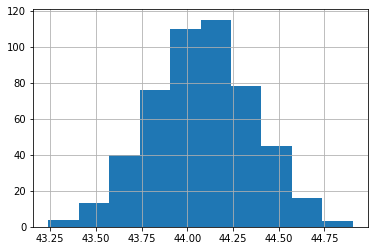

In [0]:
#DISTRIBUIÇÂO NORMAL
print('Distribuição das Médias Amostrais')
amostras.mean().hist()

In [0]:
#DESVIO PADRÃO 
print('Desvio Padrão TLC:', dados.Idade.std()/np.sqrt(n))
print('Desvio Padrão das Médias Amostrais:', amostras.mean().std())

Desvio Padrão TLC: 0.27907433027404266
Desvio Padrão das Médias Amostrais: 0.2790379947983468

#### 4.2. Provando o TCL pela Variável Renda

In [0]:
amostras2 = pd.DataFrame()
n = 1000
quant_amostras = 2000

for i in range(quant_amostras):
  _ = dados.Renda.sample(n)
  _.index = range(0, len(_))
  amostras2['amostra'+str(i)] = _

amostras2

,amostra0,amostra1,amostra2,amostra3,amostra4,amostra5,amostra6,amostra7,amostra8,amostra9,amostra10,amostra11,amostra12,amostra13,amostra14,amostra15,amostra16,amostra17,amostra18,amostra19,amostra20,amostra21,amostra22,amostra23,amostra24,amostra25,amostra26,amostra27,amostra28,amostra29,amostra30,amostra31,amostra32,amostra33,amostra34,amostra35,amostra36,amostra37,amostra38,amostra39,...,amostra1960,amostra1961,amostra1962,amostra1963,amostra1964,amostra1965,amostra1966,amostra1967,amostra1968,amostra1969,amostra1970,amostra1971,amostra1972,amostra1973,amostra1974,amostra1975,amostra1976,amostra1977,amostra1978,amostra1979,amostra1980,amostra1981,amostra1982,amostra1983,amostra1984,amostra1985,amostra1986,amostra1987,amostra1988,amostra1989,amostra1990,amostra1991,amostra1992,amostra1993,amostra1994,amostra1995,amostra1996,amostra1997,amostra1998,amostra1999
0,1100,300,40000,1200,1644,250,750,1500,1400,1700,850,1300,788,600,150,788,2000,1400,5500,200,980,20,1100,395,0,1648,4100,5000,300,360,10000,900,1350,400,2100,788,3100,5060,2000,1000,...,0,788,788,2200,788,1000,2000,750,0,300,700,1000,500,788,500,400,1900,1000,788,900,2000,1500,1900,1800,1900,1400,6000,7880,700,250,1000,5000,1300,3200,915,10000,1200,700,1500,1000
1,7000,830,1250,50,1100,2000,4000,1000,2000,1800,788,1000,60000,1900,3700,2100,788,7800,1200,1500,2800,1600,200,4500,0,700,788,800,2000,1000,1050,980,1500,4000,1600,300,1200,2000,2500,200,...,270,1500,300,2500,2500,2800,7000,788,1200,1350,1300,7000,500,789,788,2200,3000,1900,1080,750,2500,300,2000,2500,2000,1200,900,1350,1300,900,1212,2300,1000,4000,4000,2800,3500,1200,1100,996
2,16000,1400,600,2100,1200,2000,3000,740,1400,788,2200,2136,1500,2000,1000,2000,3900,2500,2800,560,1400,1900,1550,500,1000,700,6000,1100,2000,790,3500,600,3000,800,0,788,3900,1600,1400,2000,...,788,2364,1000,5000,788,1100,1200,1000,788,1200,788,788,1800,2500,1800,1400,1000,4000,1500,2600,1500,1200,6500,4500,10000,350,6000,1200,500,5000,1600,2000,1400,1000,1200,1000,500,1500,2000,400
3,5500,4000,5000,0,1300,420,4000,1800,900,825,2900,0,1500,1500,500,2000,2000,2000,15,1200,950,200,1500,1050,2000,960,850,1000,6000,9000,788,1200,200,1550,1500,788,2000,900,900,1600,...,933,1480,1800,1200,6000,900,2650,900,1500,7882,3500,1100,3000,2170,400,1200,700,400,750,570,880,1000,1600,0,250,0,4000,2100,2000,8000,1200,0,900,30000,788,1000,1200,1200,210,2000
4,400,10000,395,800,788,788,0,0,5500,1200,1300,2500,1000,1230,6000,300,300,350,1200,1200,560,1800,2000,200,500,1500,1000,1000,1400,3500,1038,400,5000,1800,3300,788,700,800,500,75,...,1200,5000,5000,2000,1200,788,788,788,600,6000,0,900,800,3000,1500,11000,1900,4000,480,10000,0,150,2000,1200,1000,350,1200,0,3000,790,1600,2200,200,788,240,400,788,850,1000,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,210,1500,788,789,300,2000,788,0,200,800,250,2500,1300,700,350,600,788,1100,500,1400,1000,4000,1200,5000,1000,3000,789,1000,890,2500,1100,900,4000,10000,2400,788,5000,2500,1000,10000,...,3000,100,600,1300,2300,788,1200,1000,5000,3000,788,2000,788,2000,350,900,1200,500,5000,2000,400,800,250,1200,3000,3555,788,400,1000,1800,788,4500,789,300,2000,788,1000,788,1200,4500
996,1000,0,2000,789,2600,1800,1100,788,0,5500,2500,15000,1200,1000,1500,6000,2000,1800,1000,2100,788,788,7200,788,4100,788,1200,300,3500,5000,3500,788,1770,2300,10000,800,1800,1500,1100,800,...,4000,10000,600,200,2400,1650,780,1200,800,100,1300,1700,1500,2000,500,841,800,500,788,1300,2100,3000,788,1400,1200,1500,2000,2200,5000,788,1400,1600,1600,2000,980,3500,788,900,1250,800
997,6000,4000,10000,7000,1200,2400,2300,788,788,30000,2000,3100,1900,360,1200,788,980,10000,8000,2300,4000,7000,1000,2000,1510,3500,788,788,3000,350,2400,1300,2500,700,788,600,5000,1200,1500

In [0]:
#MÉDIAS
print('Média da variável Renda:', dados.Renda.mean())
print('Média das médias amostrais:', amostras2.mean().mean())

Média da variável Renda: 2000.3831988547631
Média das médias amostrais: 2002.652072

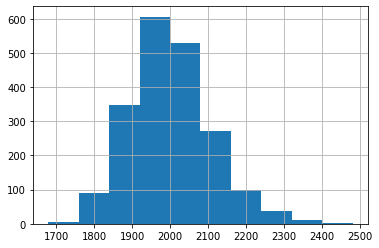

In [0]:
#DISTRIBUIÇÂO DAS MÉDIAS
print('Distribuição das Médias Amostrais')
amostras2.mean().hist()

In [0]:
#DESVIO PADRÃO
print('Desvio Padrão TCL:', dados.Renda.std()/np.sqrt(n))
print('Desvio Padrão das Médias', amostras2.mean().std())

Desvio Padrão TCL: 105.09474775752126
Desvio Padrão das Médias 106.0882106473806

### 4.2. Nível de confiança e Nível de significância

1. Nível de Significância: é a probabilidade da estimativa estar errada de acordo com uma distribuição normal.
2. Nível de Confiança: é a probabilidade de acerto da estimativa (1- alpha). Por exemplo, quando assumimos um nível de confiança igual a 95%, queremos de dizer que há propabilidade de 0.95 dos resultados expressarem bem a realidade.

### 4.3. Erro Inferencial
è definido pelo desvio padrão das médias amostrais e pelo nível de confiança determinado para o processo.

e = z(sigma/raiz(n))

### 4.4. Intervalos de Confiança 
1. IC para desvio padrão populacional conhceido: mi = xbarra + ou - z(sigma/raiz(n))
2. IC para devio padrão populacional desconheido: mi = xbarra + ou - z(s/raiz(n))

In [0]:
#Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de desvio padrão igual a 150g. Selecionada uma amostra aleatória de 20 sacos de um lote específico, obteve-se um peso médio de 5050g. Cosntrua um intervalo de confinaça para a média populacional assumindo um nível de significância de 5%

media_amostra = 5050
significancia = 0.05
confiança = 1- significancia


In [0]:
tabela_normal_padronizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


In [0]:
z = 1.96
desvio_padrao = 150
n = 20
raiz_de_n = np.sqrt(n)

In [0]:
sigma = desvio_padrao/raiz_de_n
sigma

Out[66]: 33.54101966249684

In [0]:
e = z*sigma
e

Out[67]: 65.7403985384938

In [0]:
intervalo = (media_amostra - e, media_amostra + e)
print('Intervalo de Confiança:', intervalo)

Intervalo de Confiança: (4984.2596014615065, 5115.7403985384935)

In [0]:
print('Intervalo de Confiança:', norm.interval(alpha = 0.95, loc = media_amostra, scale = sigma))

Intervalo de Confiança: (4984.260809456757, 5115.739190543243)

In [0]:
#Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.
#Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.

desvio_padrao = 6
n = 50
z = 1.96
quociente = desvio_padrao/np.sqrt(n)

print(f'Nível de Confiança de R${z*quociente}.')

Nível de Confiança de R$1.6631151493507597.

In [0]:
#Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão populacional igual a 11, resultou em uma média amostral de 28.
#Qual o intervalo de confiança de 90% para a média populacional?

n = 1976
desvio_padrao = 11
media_amostral = 28
z = norm.ppf(0.95)
quociente = desvio_padrao/np.sqrt(n)

print(f'Intervalo de Confiança:{(media_amostral - z*quociente, media_amostral + z*quociente)}.')

Intervalo de Confiança:(27.592969951356466, 28.407030048643534).

## 5. Cálculo do tamanho da Amostra

### 5.1. Varáveis quantitativas e população infinita
Problema: Estamos estudano o rendimento mensal dos chefes de domicilios do Brasil. Nosso supervisor determinou que o erro maximo em relação a media seja de R$100,00. Sabemos que o desvio padraão populacional deste grupo de trabalhadores é de R$3.323,39. Para um nível de confiança de 95%. Qual deve ser o tamanho da amostra de nosso estudo?
1. n = (z*(sigma/e))**2 - desvio padrão populacional conhecido
2. n = (z*(s/e))**2 - estimativa do desvio padrão

O desvio padrão e o erro devem estar na mesma unidade de medida

In [0]:
e = 100
desvio_padrao = 3323.39
z = norm.ppf(0.975)

n = (z*(desvio_padrao/e))**2

print(f'O tamanho ideal da amostra representativa é {round(n)}.')

O tamanho ideal da amostra representativa é 4243.0.

In [0]:
#O valor do gasto médio dos clientes de uma loja de conveniência é de R$ 45,50. Assumindo que o desvio padrão dos gastos é igual a R$ 15,00, qual deve ser o tamanho da amostra para estimarmos a média populacional com um nível de significância de 10%? Considere que o erro máximo aceitável seja de 10%.

desvio_padrao = 15
z = norm.ppf(0.95)
e = 0.1*45.50

n = (z*(desvio_padrao/e))**2
print(f'O tamanho da amostra é {round(n)}.')

O tamanho da amostra é 29.0.

### 5.2. Variáveis quantitativas e população finita
Em um lote de 10000 latas de refigerante foi realizada uma amostra aleatória simples de 100 latas e foi obtido um desvio padrão amostral do conteúdo das latas igual a 12ml. O fabricante estipula um erro máximo sobre a média populacional de apenas 5ml. Para garantir um nível de confiança de 95% qual o tamannho de amostra deve ser selecionado para este estudo?

1. n = (z^2 * sigma^2 * N)/ (z^2 * sigma^2 + e^2 + (N-1)) - com desvio padrão conhecido
2. n = (z^2 * s^2 * N)/ (z^2 * s^2 + e^2(N - 1)) - com desvio padrão desconhecido

In [0]:
N = 10000
desvio_padrao_amostral = 12
s = 12
e = 5
z = norm.ppf(0.975)

n = ((z**2)*(s**2)*N)/((z**2)*(s**2)+(e**2)*(N-1))
print(f'O tamanho da amostra representativa é: {round(n)}.')

O tamanho da amostra representativa é: 22.0.

In [0]:
#Um fabricante de farinha verificou que, em uma amostra aleatória formada por 200 sacos de 25 kg de um lote formado por 2.000 sacos, apresentou um desvio padrão amostral do peso igual a 480 g. Considerando um erro máximo associado à média populacional igual a 0,3 kg e um nível de confiança igual a 95%, qual tamanho de amostra deveria ser selecionado para obtermos uma estimativa confiável do parâmetro populacional?

N = 2000
s = 480
e = 300
z = norm.ppf(0.975)

n = ((z**2)*(s**2)*N)/((z**2)*(s**2)+(e**2)*(N-1))
print(f'O tamanho da amostra representativa é de {round(n)}')

O tamanho da amostra representativa é de 10.0

## 6. Fixando o Conteúdo
Problema: Estamos estudando o rendimento mensal dos chefes de domicílios com renda até R$5.000,00 no Brasil. Nosso supervisor determinou que o erro máximo em relação a média seja de R$10,00. Sabemos que o desvio padrão populacional deste grupo de trabalhdadores é de R$1.082,79 e que a média populacional é de R$1.426,54. Para um nível de confiança de 95%, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho da amostra obtido?

In [0]:
renda_5000 = dados.query('Renda <= 5000').Renda
renda_5000.head()

Out[80]: 0 800
1 1150
2 880
3 3500
4 150
Name: Renda, dtype: int32

In [0]:
sigma = renda_5000.std()
sigma

Out[81]: 1082.7945490306845

In [0]:
media = renda_5000.mean()
media

Out[82]: 1426.5372144947232

In [0]:
#Tamanho da amostra (assumimos que é uma população infinita)

e = 10
sigma = renda_5000.std()
z = norm.ppf(0.975)

n = (z*(sigma/e))**2
print(f'O tamanhdo da amostra representativa é {round(n)}')

O tamanhdo da amostra representativa é 45039.0

In [0]:
#Intervalo de confiança
intervalo = norm.interval(alpha = 0.95, loc = media, scale = sigma/np.sqrt(n))
print(f'O Intervalo de confiança é {intervalo}.')

O Intervalo de confiança é (1416.5372144947232, 1436.5372144947232).

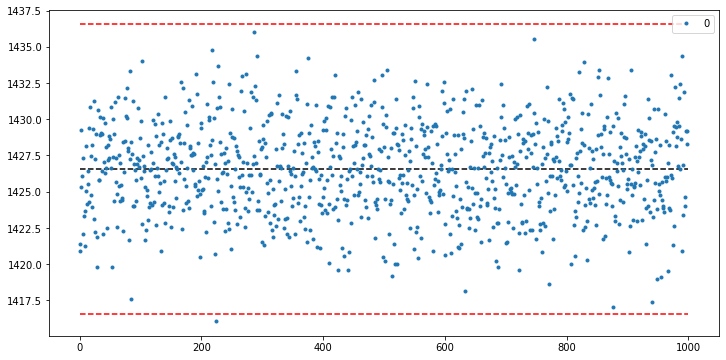

In [0]:
#Prova gráfica

import matplotlib.pyplot as plt

tamanho_simulacao = 1000

n = int(n)
medias = [renda_5000.sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12,6)
ax.hlines(y = media, xmin = 0, xmax = tamanho_simulacao, colors = 'black', linestyles = 'dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamanho_simulacao, colors = 'red', linestyles = 'dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamanho_simulacao, colors = 'red', linestyles = 'dashed')

ax